In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
# count the number of cardio issues (clean=0, issues=1)

df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

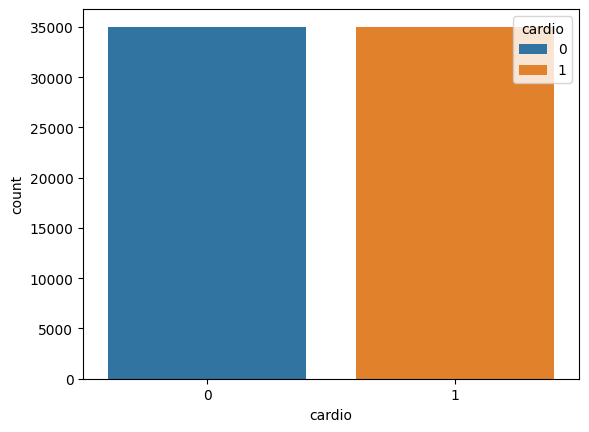

In [10]:
# take help of seaborn to visualize the data
#sns.countplot(x='cardio', data=df, palette=['green', 'red'])
sns.countplot(x='cardio', data=df, hue='cardio', legend=True)
plt.show()

In [6]:
# lists out all fields with null count
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
# checks for any null and returns True or False
df.isnull().values.any()

False

In [13]:
# another way to find null
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

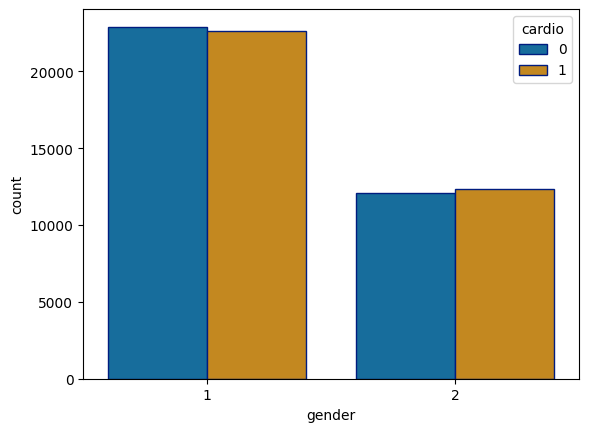

In [17]:
# visualize for gender column
sns.countplot(x='gender', data=df, hue='cardio', palette='colorblind', edgecolor=sns.color_palette('dark')[0] )

In [7]:
# visualize for age column but convert the days into years and round it first
df['yr'] = (df['age']/365).round(0).astype(int)
df['yr']

0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: yr, Length: 70000, dtype: int32

<Axes: xlabel='yr', ylabel='count'>

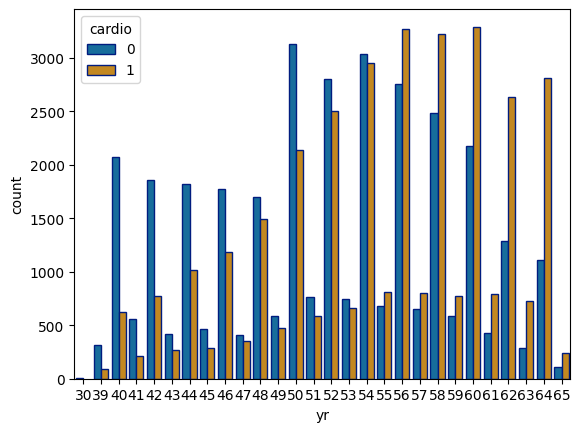

In [8]:
sns.countplot(x='yr', data=df, hue='cardio', palette='colorblind', edgecolor=sns.color_palette('dark')[0] )

### split train test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.drop(['id','cardio', 'age'] , axis=1)

In [11]:
x.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
0,2,168,62.0,110,80,1,1,0,0,1,50
1,1,156,85.0,140,90,3,1,0,0,1,55
2,1,165,64.0,130,70,3,1,0,0,0,52
3,2,169,82.0,150,100,1,1,0,0,1,48
4,1,156,56.0,100,60,1,1,0,0,0,48


In [65]:
y = df['cardio']

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42 )

### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc_model = RandomForestClassifier()

In [112]:
rfc_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [113]:
y_predict = rfc_model.predict(xtest)

In [114]:
from sklearn.metrics import accuracy_score

In [116]:
# accuracy not so good
accuracy_score(ytest, y_predict)

0.7042285714285714

In [118]:
# score not so good
rfc_model.score(xtest, ytest)

0.7042285714285714

In [75]:
x.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
0,2,168,62.0,110,80,1,1,0,0,1,50
1,1,156,85.0,140,90,3,1,0,0,1,55
2,1,165,64.0,130,70,3,1,0,0,0,52
3,2,169,82.0,150,100,1,1,0,0,1,48
4,1,156,56.0,100,60,1,1,0,0,0,48


In [77]:
x.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
0,2,168,62.0,110,80,1,1,0,0,1,50
1,1,156,85.0,140,90,3,1,0,0,1,55
2,1,165,64.0,130,70,3,1,0,0,0,52
3,2,169,82.0,150,100,1,1,0,0,1,48
4,1,156,56.0,100,60,1,1,0,0,0,48


### Try with Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dtc_model = DecisionTreeClassifier()

In [79]:
dtc_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [80]:
# worse performance
dtc_model.score(xtest, ytest)

0.6362857142857142

### Try other classification algorithm to see if score improves

In [81]:
# try SVM
from sklearn.svm import SVC

In [86]:
svc_model = SVC()

In [87]:
svc_model.fit(xtrain, ytrain)

SVC()

In [89]:
svc_model.score(xtest, ytest)

0.7220571428571428

###  xgBoost

In [93]:
#!pip install xgboost

In [94]:
from xgboost import XGBClassifier

In [95]:
xgb_model = XGBClassifier()

In [96]:
xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
xgb_model.score(xtest, ytest)

0.7341714285714286

In [98]:
y_predict_xgb = xgb_model.predict(xtest)

In [99]:
accuracy_score(ytest, y_predict_xgb)

0.7341714285714286